# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Import API keys
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up list to hold response info
city_name = []
country = []
lat = []
lon = []
date = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

# Loop through the list of cities and perform a request for the weather data on each city
for city in cities:
# city = cities[601]

#print(f"Getting data for {city} on {date}")   

    response = requests.get(query_url + city).json()

    try:
        city_name.append(response['name'])

        country.append(response['sys']['country'])

        lat.append(response['coord']['lat'])

        lon.append(response['coord']['lon'])

        date.append(response['dt'])

        max_temp.append(response['main']['temp_max'])

        humidity.append(response['main']['humidity'])

        cloudiness.append(response['clouds']['all'])

        wind_speed.append(response['wind']['speed'])

        print(f"Getting data for {city}") 


    except KeyError: 
        print("Record does not exist")



Getting data for cherskiy
Getting data for ahipara
Getting data for hasaki
Getting data for ushuaia
Getting data for portland
Getting data for cape town
Getting data for tasiilaq
Getting data for lanzhou
Record does not exist
Getting data for quatre cocos
Getting data for mount isa
Getting data for boa vista
Getting data for punta arenas
Getting data for barrow
Getting data for kuvandyk
Getting data for rikitea
Getting data for raudeberg
Getting data for ponta do sol
Getting data for kavieng
Getting data for novobirilyussy
Getting data for katobu
Getting data for khatanga
Getting data for nhulunbuy
Getting data for iranshahr
Record does not exist
Getting data for honiara
Getting data for puerto ayora
Getting data for sinnamary
Getting data for coihaique
Getting data for acapulco
Record does not exist
Getting data for asau
Getting data for formiga
Getting data for mataura
Getting data for vaini
Getting data for kahului
Getting data for albany
Getting data for pitimbu
Getting data for le

Getting data for lakhdenpokhya
Getting data for wanning
Getting data for magaria
Getting data for carballo
Getting data for awbari
Getting data for provideniya
Getting data for spearfish
Getting data for san patricio
Getting data for padang
Getting data for ouadda
Getting data for sawtell
Getting data for nouadhibou
Getting data for yeniseysk
Getting data for tabuleiro do norte
Getting data for svetlaya
Getting data for hay river
Getting data for coahuayana
Getting data for beringovskiy
Getting data for gabu
Record does not exist
Getting data for christchurch
Getting data for meulaboh
Record does not exist
Record does not exist
Getting data for naze
Getting data for chibuto
Record does not exist
Getting data for tura
Getting data for tabuk
Getting data for praia da vitoria
Getting data for gobabis
Getting data for mamlyutka
Record does not exist
Getting data for crestwood
Getting data for seydi
Getting data for dhidhdhoo
Record does not exist
Getting data for moose factory
Getting data

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert raw data into a data frame
weather_dict = {"City": city_name, "Country": country, "Lat": lat, "Lon": lon, "Date": date, "Max Temp (cs)": max_temp, "Humidity": humidity, 
                        "Cloudiness": cloudiness, "Wind Speed (mph)": wind_speed}


weather_df = pd.DataFrame(weather_dict)
# Display the DataFrame
weather_df

,City,Country,Lat,Lon,Date,Max Temp (cs),Humidity,Cloudiness,Wind Speed (mph)
0,Cherskiy,RU,68.7500,161.3000,1611760671,-31.63,84,100,1.52
1,Ahipara,NZ,-35.1667,173.1667,1611760465,17.12,92,30,1.13
2,Hasaki,JP,35.7333,140.8333,1611760671,5.00,65,40,4.63
3,Ushuaia,AR,-54.8000,-68.3000,1611760671,7.00,70,75,7.20
4,Portland,US,45.5234,-122.6762,1611760204,3.33,95,100,2.23
...,...,...,...,...,...,...,...,...,...
550,Forestville,US,38.8451,-76.8750,1611760740,5.00,65,90,4.12
551,Moram,IN,17.8000,76.4667,1611760518,24.84,28,0,2.40
552,Gornopravdinsk,RU,60.0500,69.9000,1611760740,-19.68,92,100,2.52
553,Natal'insk,RU,56.4739,57.8698,1611760740,-8.01,96,95,3.52


In [6]:
# Export the city data into a .csv using encoding utf-8 to avoid issues later
weather_df.to_csv("weather_data.csv", encoding="utf-8", index=False)

# index=False, header=True

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
#Find the max humidity
print(weather_df["Humidity"].max())
print(weather_df["Humidity"].min())
print("\n" f"There are no cities with humidity >100% within this dataset.")
print("\n" f"Humidity that is >100% is called supersaturation. At any given temperature and air pressure, a specific maximum amount of water vapor in the air will produce a relative humidity (RH) of 100 percent. Supersaturated air literally contains more water vapor than is needed to cause saturation.")

100
1

There are no cities with humidity >100% within this dataset.

Humidity that is >100% is called supersaturation. At any given temperature and air pressure, a specific maximum amount of water vapor in the air will produce a relative humidity (RH) of 100 percent. Supersaturated air literally contains more water vapor than is needed to cause saturation.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

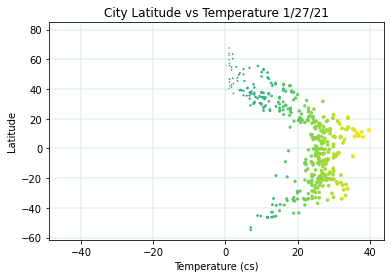

The code is analysing the relationship between city latitude and temperature.
The closer a city is to the equator (0 latitude) the warmer the temperature.


In [119]:
x_values = weather_df['Max Temp (cs)']
y_values = weather_df['Lat']
plt.scatter(x_values,y_values, marker='.', s = weather_df['Max Temp (cs)']*1, c=weather_df['Max Temp (cs)'], cmap='viridis')
# plt.colorbar()
plt.title('City Latitude vs Temperature 1/27/21')
plt.xlabel('Temperature (cs)')
plt.ylabel('Latitude')
plt.grid(color='teal', linestyle='-', linewidth=.15) 

# Save the plot as a png
plt.savefig("lat_vs_temp_plot.png")
plt.show()

# Add a sentence or two explaining what the code is analyzing.
print(f'The code is analysing the relationship between city latitude and temperature.')
print(f'The closer a city is to the equator (0 latitude) the warmer the temperature.')

## Latitude vs. Humidity Plot

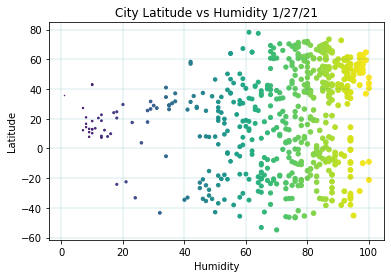

The code is analysing the relationship between city latitude and humidity.
There is no obvious relationship between latitude and humidity.


In [118]:
x_values = weather_df['Humidity']
y_values = weather_df['Lat']
plt.scatter(x_values,y_values, marker='.', s = weather_df['Humidity']*1, c=weather_df['Humidity'], cmap='viridis')
# plt.colorbar()
plt.title('City Latitude vs Humidity 1/27/21')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.grid(color='teal', linestyle='-', linewidth=.15)

# Save the plot as a png
plt.savefig("lat_vs_hum_plot.png")
plt.show()

# Add a sentence or two explaining what the code is analyzing.
print(f'The code is analysing the relationship between city latitude and humidity.')
print(f'There is no obvious relationship between latitude and humidity.')

## Latitude vs. Cloudiness Plot

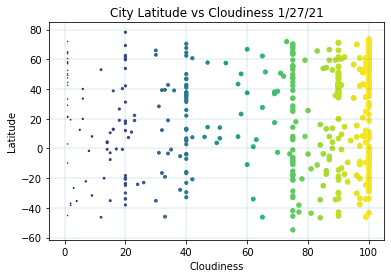

The code is analysing the relationship between city latitude and cloudiness.
There is no obvious relationship between latitude and cloudiness.


In [117]:
x_values = weather_df['Cloudiness']
y_values = weather_df['Lat']
plt.scatter(x_values,y_values, marker='.', s = weather_df['Cloudiness']*1, c=weather_df['Cloudiness'], cmap='viridis')
# plt.colorbar()
plt.title('City Latitude vs Cloudiness 1/27/21')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.grid(color='teal', linestyle='-', linewidth=.15)

# Save the plot as a png
plt.savefig("lat_vs_cloud_plot.png")
plt.show()

# Add a sentence or two explaining what the code is analyzing.
print(f'The code is analysing the relationship between city latitude and cloudiness.')
print(f'There is no obvious relationship between latitude and cloudiness.')

## Latitude vs. Wind Speed Plot

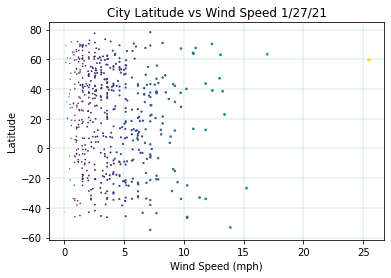

The code is analysing the relationship between city latitude and wind speed.
While there is no obvious relationship between latitude and wind speed, most cities have wind speeds of <10 mph.


In [116]:
x_values = weather_df['Wind Speed (mph)']
y_values = weather_df['Lat']
plt.scatter(x_values,y_values, marker='.', s = weather_df['Wind Speed (mph)']*1, c=weather_df['Wind Speed (mph)'], cmap='viridis')
# plt.colorbar()
plt.title('City Latitude vs Wind Speed 1/27/21')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.grid(color='teal', linestyle='-', linewidth=.15)

# Save the plot as a png
plt.savefig("lat_vs_wind_plot.png")
plt.show()

# Add a sentence or two explaining what the code is analyzing.
print(f'The code is analysing the relationship between city latitude and wind speed.')
print(f'While there is no obvious relationship between latitude and wind speed, most cities have wind speeds of <10 mph.')

## Linear Regression

In [32]:
#Create a N. Hemisphere and S. Hemosphere weather_df
mask = weather_df['Lat'] > 0
nor_hem_weather = weather_df[mask]
sou_hem_weather = weather_df[~mask]

In [110]:
sou_hem_weather

,City,Country,Lat,Lon,Date,Max Temp (cs),Humidity,Cloudiness,Wind Speed (mph)
1,Ahipara,NZ,-35.1667,173.1667,1611760465,17.12,92,30,1.13
3,Ushuaia,AR,-54.8000,-68.3000,1611760671,7.00,70,75,7.20
5,Cape Town,ZA,-33.9258,18.4232,1611760338,22.78,49,20,11.83
8,Quatre Cocos,MU,-20.2078,57.7625,1611760672,28.00,65,20,1.54
9,Mount Isa,AU,-20.7333,139.5000,1611760672,29.00,61,42,2.57
...,...,...,...,...,...,...,...,...,...
540,Kimbe,PG,-5.5502,150.1429,1611760739,25.63,84,100,0.94
541,Goiatuba,BR,-18.0125,-49.3547,1611760739,26.66,71,96,3.81
546,Neiafu,TO,-18.6500,-173.9833,1611760739,26.00,83,90,4.63
547,Roboré,BO,-18.3333,-59.7500,1611760739,27.00,74,75,7.72


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between City Latitude and Temperature in the N. Hemisphere is -0.87.


/Users/abigailmilton/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/abigailmilton/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


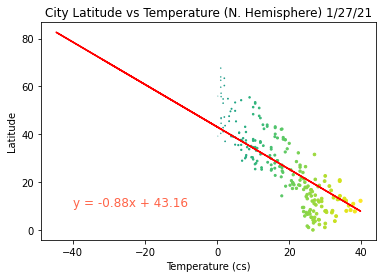

The code is analysing the relationship between city latitude and temperature in the northern hemisphere.
The closer a city is to the equator (0 latitude) the warmer the temperature.


In [115]:
x = nor_hem_weather['Max Temp (cs)']
y = nor_hem_weather['Lat']

# Calculate the correlation coefficient
correlation = st.pearsonr(x, y)
print(f"The correlation between City Latitude and Temperature in the N. Hemisphere is {round(correlation[0],2)}.")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Creat the scatter plot w/ lineaer regression
plt.scatter(x, y, marker='.', s = nor_hem_weather['Max Temp (cs)']*1, c=nor_hem_weather['Max Temp (cs)'], cmap='viridis')
plt.plot(x,regress_values,"r-")

# Annotate the linear regression
plt.annotate(line_eq,(-40,10),fontsize=12,color="tomato")

# # Set limits on x and y axis
# plt.xlim(-1, 35)
# plt.ylim(-30, 80)

# Add labels
plt.title('City Latitude vs Temperature (N. Hemisphere) 1/27/21')
plt.xlabel('Temperature (cs)')
plt.ylabel('Latitude')

# Save the plot as a png
plt.savefig("nh_latvstemp_lr_plot.png")
plt.show()

# Add a sentence or two explaining what the code is analyzing.
print(f'The code is analysing the relationship between city latitude and temperature in the northern hemisphere.')
print(f'The closer a city is to the equator (0 latitude) the warmer the temperature.')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between City Latitude and Temperature in the S. Hemisphere is 0.6.


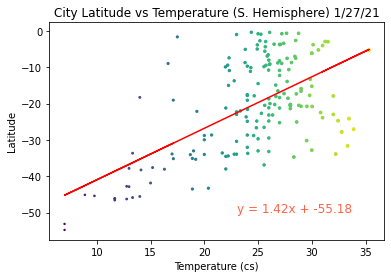

The code is analysing the relationship between city latitude and temperature in the southern hemisphere.
The closer a city is to the equator (0 latitude) the warmer the temperature.
City density goes down the further away you get from the equator.


In [114]:
x = sou_hem_weather['Max Temp (cs)']
y = sou_hem_weather['Lat']

# Calculate the correlation coefficient
correlation = st.pearsonr(x, y)
print(f"The correlation between City Latitude and Temperature in the S. Hemisphere is {round(correlation[0],2)}.")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Creat the scatter plot w/ lineaer regression
plt.scatter(x, y, marker='.', s = sou_hem_weather['Max Temp (cs)']*1, c=sou_hem_weather['Max Temp (cs)'], cmap='viridis')
plt.plot(x,regress_values,"r-")

# Annotate the linear regression
plt.annotate(line_eq,(23,-50),fontsize=12,color="tomato")

# # Set limits on x and y axis
# plt.xlim(-1, 35)
# plt.ylim(-30, 80)

# Add labels
plt.title('City Latitude vs Temperature (S. Hemisphere) 1/27/21')
plt.xlabel('Temperature (cs)')
plt.ylabel('Latitude')

# Save plot as png
plt.savefig("sh_latvstemp_lr_plot.png")
plt.show()

# Add a sentence or two explaining what the code is analyzing.
print(f'The code is analysing the relationship between city latitude and temperature in the southern hemisphere.')
print(f'The closer a city is to the equator (0 latitude) the warmer the temperature.')
print(f'City density goes down the further away you get from the equator.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between City Latitude and Humidity in the N. Hemisphere is 0.43.


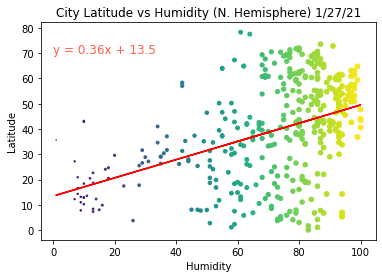

The code is analysing the relationship between city latitude and humidty in the northern hemisphere.
Latitude is not showing an impact on humidity.


In [121]:
x = nor_hem_weather['Humidity']
y = nor_hem_weather['Lat']

# Calculate the correlation coefficient
correlation = st.pearsonr(x, y)
print(f"The correlation between City Latitude and Humidity in the N. Hemisphere is {round(correlation[0],2)}.")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Creat the scatter plot w/ lineaer regression
plt.scatter(x, y, marker='.', s = nor_hem_weather['Humidity']*1, c=nor_hem_weather['Humidity'], cmap='viridis')
plt.plot(x,regress_values,"r-")

# Annotate the linear regression
plt.annotate(line_eq,(0,70),fontsize=12,color="tomato")

# # Set limits on x and y axis
# plt.xlim(-1, 35)
# plt.ylim(-30, 80)

# Add labels
plt.title('City Latitude vs Humidity (N. Hemisphere) 1/27/21')
plt.xlabel('Humidity')
plt.ylabel('Latitude')

# Save plot as png
plt.savefig("nh_latvshumid_lr_plot.png")
plt.show()

# Add a sentence or two explaining what the code is analyzing.
print(f'The code is analysing the relationship between city latitude and humidty in the northern hemisphere.')
print(f'Latitude is not showing an impact on humidity.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between City Latitude and Humidity in the S. Hemisphere is 0.18.


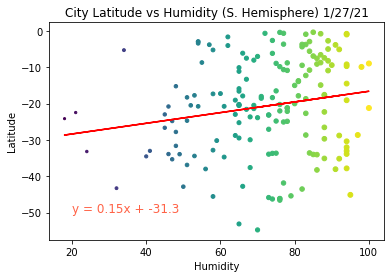

The code is analysing the relationship between city latitude and humidty in the southern hemisphere.
Latitude is not showing an impact on humidity.


In [122]:
x = sou_hem_weather['Humidity']
y = sou_hem_weather['Lat']

# Calculate the correlation coefficient
correlation = st.pearsonr(x, y)
print(f"The correlation between City Latitude and Humidity in the S. Hemisphere is {round(correlation[0],2)}.")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Creat the scatter plot w/ lineaer regression
plt.scatter(x, y, marker='.', s = sou_hem_weather['Humidity']*1, c=sou_hem_weather['Humidity'], cmap='viridis')
plt.plot(x,regress_values,"r-")

# Annotate the linear regression
plt.annotate(line_eq,(20,-50),fontsize=12,color="tomato")

# # Set limits on x and y axis
# plt.xlim(-1, 35)
# plt.ylim(-30, 80)

# Add labels
plt.title('City Latitude vs Humidity (S. Hemisphere) 1/27/21')
plt.xlabel('Humidity')
plt.ylabel('Latitude')

# Save plot as png
plt.savefig("sh_latvshumid_lr_plot.png")
plt.show()

# Add a sentence or two explaining what the code is analyzing.
print(f'The code is analysing the relationship between city latitude and humidty in the southern hemisphere.')
print(f'Latitude is not showing an impact on humidity.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between City Latitude and Cloudiness in the N. Hemisphere is 0.23.


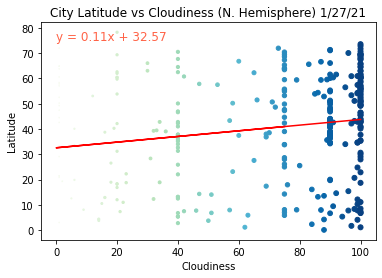

The code is analysing the relationship between city latitude and cloudiness in the northern hemisphere.
Latitude is not showing an impact on cloudiness.


In [123]:
x = nor_hem_weather['Cloudiness']
y = nor_hem_weather['Lat']

# Calculate the correlation coefficient
correlation = st.pearsonr(x, y)
print(f"The correlation between City Latitude and Cloudiness in the N. Hemisphere is {round(correlation[0],2)}.")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Creat the scatter plot w/ lineaer regression
plt.scatter(x, y, marker='.', s = nor_hem_weather['Cloudiness']*1, c=nor_hem_weather['Cloudiness'], cmap='GnBu')
plt.plot(x,regress_values,"r-")

# Annotate the linear regression
plt.annotate(line_eq,(0,75),fontsize=12,color="tomato")

# # Set limits on x and y axis
# plt.xlim(-1, 35)
# plt.ylim(-30, 80)

# Add labels
plt.title('City Latitude vs Cloudiness (N. Hemisphere) 1/27/21')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')

# Save plot as png
plt.savefig("nh_latvscloud_lr_plot.png")
plt.show()

# Add a sentence or two explaining what the code is analyzing.
print(f'The code is analysing the relationship between city latitude and cloudiness in the northern hemisphere.')
print(f'Latitude is not showing an impact on cloudiness.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between City Latitude and Cloudiness in the S. Hemisphere is 0.21.


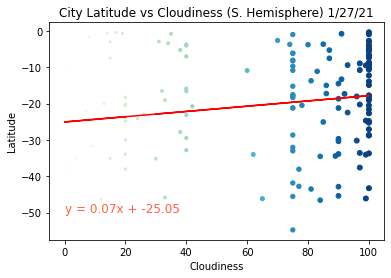

The code is analysing the relationship between city latitude and cloudiness in the southern hemisphere.
Latitude is not showing an impact on cloudiness.


In [124]:
x = sou_hem_weather['Cloudiness']
y = sou_hem_weather['Lat']

# Calculate the correlation coefficient
correlation = st.pearsonr(x, y)
print(f"The correlation between City Latitude and Cloudiness in the S. Hemisphere is {round(correlation[0],2)}.")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Creat the scatter plot w/ lineaer regression
plt.scatter(x, y, marker='.', s = sou_hem_weather['Cloudiness']*1, c=sou_hem_weather['Cloudiness'], cmap='GnBu')
plt.plot(x,regress_values,"r-")

# Annotate the linear regression
plt.annotate(line_eq,(0,-50),fontsize=12,color="tomato")

# # Set limits on x and y axis
# plt.xlim(-1, 35)
# plt.ylim(-30, 80)

# Add labels
plt.title('City Latitude vs Cloudiness (S. Hemisphere) 1/27/21')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')

# Save plot as png
plt.savefig("sh_latvscloud_lr_plot.png")
plt.show()

# Add a sentence or two explaining what the code is analyzing.
print(f'The code is analysing the relationship between city latitude and cloudiness in the southern hemisphere.')
print(f'Latitude is not showing an impact on cloudiness.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between City Latitude and Wind Speed in the N. Hemisphere is -0.03.


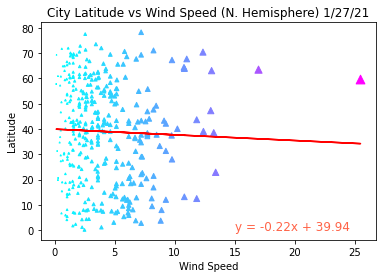

The code is analysing the relationship between city latitude and wind speed in the northern hemisphere.
Latitude is not showing an impact on windpseed.


In [125]:
x = nor_hem_weather['Wind Speed (mph)']
y = nor_hem_weather['Lat']

# Calculate the correlation coefficient
correlation = st.pearsonr(x, y)
print(f"The correlation between City Latitude and Wind Speed in the N. Hemisphere is {round(correlation[0],2)}.")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Creat the scatter plot w/ lineaer regression
plt.scatter(x, y, marker='^', s = nor_hem_weather['Wind Speed (mph)']*3, c=nor_hem_weather['Wind Speed (mph)'], cmap='cool')
plt.plot(x,regress_values,"r-")

# Annotate the linear regression
plt.annotate(line_eq,(15,0),fontsize=12,color="tomato")

# # Set limits on x and y axis
# plt.xlim(-1, 35)
# plt.ylim(-30, 80)

# Add labels
plt.title('City Latitude vs Wind Speed (N. Hemisphere) 1/27/21')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')

# Save plot as png
plt.savefig("nh_latvswind_lr_plot.png")
plt.show()

# Add a sentence or two explaining what the code is analyzing.
print(f'The code is analysing the relationship between city latitude and wind speed in the northern hemisphere.')
print(f'Latitude is not showing an impact on windpseed.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between City Latitude and Wind Speed in the S. Hemisphere is -0.22.


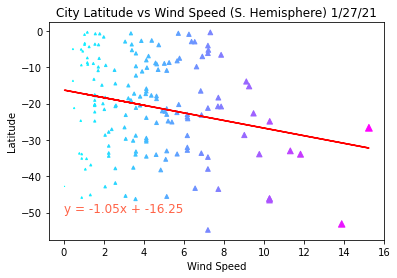

The code is analysing the relationship between city latitude and wind speed in the southern hemisphere.
Latitude is not showing an impact on windpseed.


In [126]:
x = sou_hem_weather['Wind Speed (mph)']
y = sou_hem_weather['Lat']

# Calculate the correlation coefficient
correlation = st.pearsonr(x, y)
print(f"The correlation between City Latitude and Wind Speed in the S. Hemisphere is {round(correlation[0],2)}.")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Creat the scatter plot w/ lineaer regression
plt.scatter(x, y, marker='^', s = sou_hem_weather['Wind Speed (mph)']*3, c=sou_hem_weather['Wind Speed (mph)'], cmap='cool')
plt.plot(x,regress_values,"r-")

# Annotate the linear regression
plt.annotate(line_eq,(0,-50),fontsize=12,color="tomato")

# # Set limits on x and y axis
# plt.xlim(-1, 35)
# plt.ylim(-30, 80)

# Add labels
plt.title('City Latitude vs Wind Speed (S. Hemisphere) 1/27/21')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')

# Save plot as png
plt.savefig("sh_latvswind_lr_plot.png")
plt.show()

# Add a sentence or two explaining what the code is analyzing.
print(f'The code is analysing the relationship between city latitude and wind speed in the southern hemisphere.')
print(f'Latitude is not showing an impact on windpseed.')